<h2 align="center" style="color:deepskyblue">Лабораторна робота №1 (складний рівень)</h2>

### $\color{deepskyblue}{\text{Мета роботи}}$
Отримати досвід використання основних методів та засобів аналізу даних у середовищі розробки IPython Notebook на реальних наборах даних.

### $\color{deepskyblue}{\text{Опис даних}}$
В якості вхідних даних для аналізу будуть використовуватися реальні дані із наземних постів міста Києва по якості повітря.

<span style="color:deepskyblue">*Наземні дані з постів*</span>

Наземні дані з постів міста Києва надаються у табличному форматі .csv та мають структуру, яка наведена на рисунку з наступними параметрами

* **Device_id** - ID посту, де відбувається вимірювання. Для Києва таких постів 213(*архів Ecobot_16_11_2020.rar*). Відповідно кожен пост має свій унікальний ID, який потрібно використовувати (він зазначений у назві відповідного .csv-файлу).
* **Phenomen** - тип забруднення повітря. Це може бути оксид вуглецю, діоксид вуглецю, PM2.5, PM10, тиск, температура тощо. Залежно від посту та датчику, який там встановлено, ці набори даних можуть змінюватися.
* **Value** - значення відповідного забрудника
* **Logged_at** - час, коли відбувся вимір. Варто зазначити, що залежно від налаштувань датчика вимірювання можуть зберігатися як кожень день, так і кожну годину чи хвилину.

### <span style="color:deepskyblue">Завдання</span>
1. Завантажити дані з одного або декількох постів з [джерела](https://www.saveecobot.com/maps). Бажано обрати такі пости моніторингу, щоб був достатньо великий часовий ряд даних(хоча б за попередній рік), а також щоб були різні типи забруднюючих речовин.
2. Проаналізувати завантажений датасет, провести підготовку для роботи із ним (форматування, видалення пустих значень тощо).
3. Знайти можливі залежності між забруднювачами повітря (чи залежить забруднювач PM2.5 від чадного газу і тд). Зробити це з використанням частину набору даних на навчання, іншу частину - на тестування моделі

    - Залежність забрудника від часу дня(зранку повітря брудніше ніж вночі - це припущення. Обгрунтувати або спростувати його).
    - Залежність одного забрудника від іншого

5. Отримати чисельні оцінки (RMSE, R^2) отриманої моделі.
6. Описати отримані результати та виокремити отримані висновки та припущення.

<h3 align="center" style="color:deepskyblue"><i>Виконання завдання:</i></h3>

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Setup complete")

Setup complete


In [2]:
df = pd.read_csv("post.csv")

In [3]:
df.head(25)

,device_id,phenomenon,value,logged_at,value_text
0,22643,temperature,6.0071,2022-12-31 22:00:00,NaN
1,22643,humidity,76.6429,2022-12-31 22:00:00,NaN
2,22643,pressure_pa,997743.0000,2022-12-31 22:00:00,NaN
3,22643,pm1,16.6714,2022-12-31 22:00:00,NaN
4,22643,pm25,17.4714,2022-12-31 22:00:00,NaN
5,22643,pm10,18.5286,2022-12-31 22:00:00,NaN
6,22643,no2_ug,9.0500,2022-12-31 22:00:00,NaN
7,22643,so2_ug,0.0000,2022-12-31 22:00:00,NaN
8,22643,co_mg,0.2834,2022-12-31 22:00:00,NaN
9,22643,no2_ppb,4.6469,2022-12-31 22:00:00,NaN


Стовпчики <span style="color:cyan">**device_id**</span>, <span style="color:cyan">**value_text**</span> містять не важливу інформацію для роботи, тому видаляємо їх

In [4]:
upd_df = df.iloc[:, 1:4]
upd_df.head()

,phenomenon,value,logged_at
0,temperature,6.0071,2022-12-31 22:00:00
1,humidity,76.6429,2022-12-31 22:00:00
2,pressure_pa,997743.0000,2022-12-31 22:00:00
3,pm1,16.6714,2022-12-31 22:00:00
4,pm25,17.4714,2022-12-31 22:00:00


Перевертаємо датасет так, щоб <span style="color:cyan">**logged_at**</span> став індекс

In [5]:
pt_df = pd.pivot_table(upd_df, index=["logged_at"], columns=["phenomenon"])
pt_df.head()

value                                                  \
phenomenon            co_mg  co_ppm gamma humidity no2_ppb  no2_ug      pm1   
logged_at                                                                     
2022-12-31 22:00:00  0.2834  0.2390   NaN  76.6429  4.6469  9.0500  16.6714   
2022-12-31 22:20:00  0.2933  0.2474   NaN  76.5385  4.5225  8.8077  17.2769   
2022-12-31 22:40:00  0.2991  0.2523   NaN  77.0000  4.6489  9.0539  17.8923   
2022-12-31 23:00:00  0.3013  0.2541   NaN  77.0000  3.8137  7.4273  18.4455   
2022-12-31 23:20:00  0.2910  0.2455   NaN  76.9000  3.3273  6.4800  18.3500   

                                                                              
phenomenon              pm10     pm25 pressure_pa so2_ppb so2_ug temperature  
logged_at                                                                     
2022-12-31 22:00:00  18.5286  17.4714    997743.0  0.0000   0.00      6.0071  
2022-12-31 22:20:00  19.2538  18.1077    997908.0  0.0000   0.00      6.0539  
2022-12-31 22:40:00  20.4923  18.7692    998000.0  0.0000   0.00      6.0385  
2022-12-31 23:00:00  20.6091  19.2636    997873.0  0.0000   0.00      6.0818  
2022-12-31 23:20:00  20.3800  19.1700    997700.0  0.0258   0.07      6.1600

In [6]:
pt_df.isna().any()

       phenomenon 
value  co_mg          True
       co_ppm         True
       gamma          True
       humidity       True
       no2_ppb        True
       no2_ug         True
       pm1            True
       pm10           True
       pm25           True
       pressure_pa    True
       so2_ppb        True
       so2_ug         True
       temperature    True
dtype: bool

In [7]:
pt_df

value                                              \
phenomenon              co_mg    co_ppm       gamma   humidity    no2_ppb   
logged_at                                                                   
2022-12-31 22:00:00  0.283400  0.239000         NaN  76.642900   4.646900   
2022-12-31 22:20:00  0.293300  0.247400         NaN  76.538500   4.522500   
2022-12-31 22:40:00  0.299100  0.252300         NaN  77.000000   4.648900   
2022-12-31 23:00:00  0.301300  0.254100         NaN  77.000000   3.813700   
2022-12-31 23:20:00  0.291000  0.245500         NaN  76.900000   3.327300   
...                       ...       ...         ...        ...        ...   
2024-09-25 20:40:00  0.256467  0.216367   97.361117  35.611750  10.257833   
2024-09-25 21:00:00  0.247900  0.209100  101.500000  36.071450   9.525550   
2024-09-25 21:20:00  0.264870  0.223350   94.954550  37.668750   9.472050   
2024-09-25 21:40:00  0.270967  0.228533   98.701917  39.052083  11.532750   
2024-09-25 22:00:00  0.288000  0.242900  103.272500  40.000000  11.683400   

                                                                 \
phenomenon              no2_ug        pm1       pm10       pm25   
logged_at                                                         
2022-12-31 22:00:00   9.050000  16.671400  18.528600  17.471400   
2022-12-31 22:20:00   8.807700  17.276900  19.253800  18.107700   
2022-12-31 22:40:00   9.053900  17.892300  20.492300  18.769200   
2022-12-31 23:00:00   7.427300  18.445500  20.609100  19.263600   
2022-12-31 23:20:00   6.480000  18.350000  20.380000  19.170000   
...                        ...        ...        ...        ...   
2024-09-25 20:40:00  19.975333   6.345600  25.676083   9.992000   
2024-09-25 21:00:00  18.549300   6.267150  26.483550   9.801450   
2024-09-25 21:20:00  18.445170   7.215670  28.725750  11.102000   
2024-09-25 21:40:00  22.458033   8.935417  29.981633  13.251083   
2024-09-25 22:00:00  22.751450  10.335700  33.388550  14.880000   

                                                                     
phenomenon             pressure_pa   so2_ppb     so2_ug temperature  
logged_at                                                            
2022-12-31 22:00:00  997743.000000  0.000000   0.000000    6.007100  
2022-12-31 22:20:00  997908.000000  0.000000   0.000000    6.053900  
2022-12-31 22:40:00  998000.000000  0.000000   0.000000    6.038500  
2022-12-31 23:00:00  997873.000000  0.000000   0.000000    6.081800  
2022-12-31 23:20:00  997700.000000  0.025800   0.070000    6.160000  
...                            ...       ...        ...         ...  
2024-09-25 20:40:00  995892.000000  5.738167  15.560800   21.889583  
2024-09-25 21:00:00  995945.000000  5.579850  15.131450   21.646450  
2024-09-25 21:20:00  995939.200000  5.838280  15.832250   21.213580  
2024-09-25 21:40:00  995986.333333  5.835983  15.826083   20.842367  
2024-09-25 22:00:00  995983.000000  5.517450  14.962150   20.601450  

[40860 rows x 13 columns]

In [8]:
pt_df = pt_df.dropna()
pt_df.isna().any()

       phenomenon 
value  co_mg          False
       co_ppm         False
       gamma          False
       humidity       False
       no2_ppb        False
       no2_ug         False
       pm1            False
       pm10           False
       pm25           False
       pressure_pa    False
       so2_ppb        False
       so2_ug         False
       temperature    False
dtype: bool

Трохи змінимо назви стовпчиків

In [9]:
features = ["co_mg", "co_ppm", "gamma", "humidity", 
            "no2_ppb", "no2_ug", "pm1", "pm10", "pm25", 
            "pressure_pa", "so2_ppb", "so2_ug", "temperature"]
pt_df.columns = features
pt_df.head()

,co_mg,co_ppm,gamma,humidity,no2_ppb,no2_ug,pm1,pm10,pm25,pressure_pa,so2_ppb,so2_ug,temperature
logged_at,,,,,,,,,,,,,
2023-09-18 15:40:00,0.247625,0.20885,91.045460,36.33635,11.780175,22.94205,8.229100,22.381600,10.276350,999523.5,2.865275,7.770000,24.657250
2023-09-18 16:20:00,0.197680,0.16676,96.925933,36.70000,3.888460,7.57288,8.260000,19.381340,9.956880,999300.0,2.898580,7.860440,24.400000
2023-09-18 16:40:00,0.206200,0.17390,94.400000,36.53330,5.385000,10.48740,8.380000,21.746700,10.453300,999167.0,3.111500,8.437767,24.240000
2023-09-18 17:20:00,0.208540,0.17584,96.569644,36.56375,3.784125,7.36960,8.021075,18.024975,9.626725,998877.5,3.071160,8.328240,23.987275
2023-09-18 17:40:00,0.220050,0.18560,96.800000,37.69210,6.894100,13.42630,8.333400,20.291850,10.164350,998805.0,3.028650,8.213150,23.666600


<span style="color:cyan">*gamma*</span> - має багато "NaN" значень, видалимо цей стовпчик

In [10]:
features_ = ["co_mg", "co_ppm", "humidity", "no2_ppb", 
             "no2_ug", "pm1", "pm10", "pm25", 
             "pressure_pa", "so2_ppb", "so2_ug", "temperature"]
upt_df = pt_df[features_]
upt_df.head()

,co_mg,co_ppm,humidity,no2_ppb,no2_ug,pm1,pm10,pm25,pressure_pa,so2_ppb,so2_ug,temperature
logged_at,,,,,,,,,,,,
2023-09-18 15:40:00,0.247625,0.20885,36.33635,11.780175,22.94205,8.229100,22.381600,10.276350,999523.5,2.865275,7.770000,24.657250
2023-09-18 16:20:00,0.197680,0.16676,36.70000,3.888460,7.57288,8.260000,19.381340,9.956880,999300.0,2.898580,7.860440,24.400000
2023-09-18 16:40:00,0.206200,0.17390,36.53330,5.385000,10.48740,8.380000,21.746700,10.453300,999167.0,3.111500,8.437767,24.240000
2023-09-18 17:20:00,0.208540,0.17584,36.56375,3.784125,7.36960,8.021075,18.024975,9.626725,998877.5,3.071160,8.328240,23.987275
2023-09-18 17:40:00,0.220050,0.18560,37.69210,6.894100,13.42630,8.333400,20.291850,10.164350,998805.0,3.028650,8.213150,23.666600


In [11]:
len_subplt = int(np.sqrt(len(features_)))+1

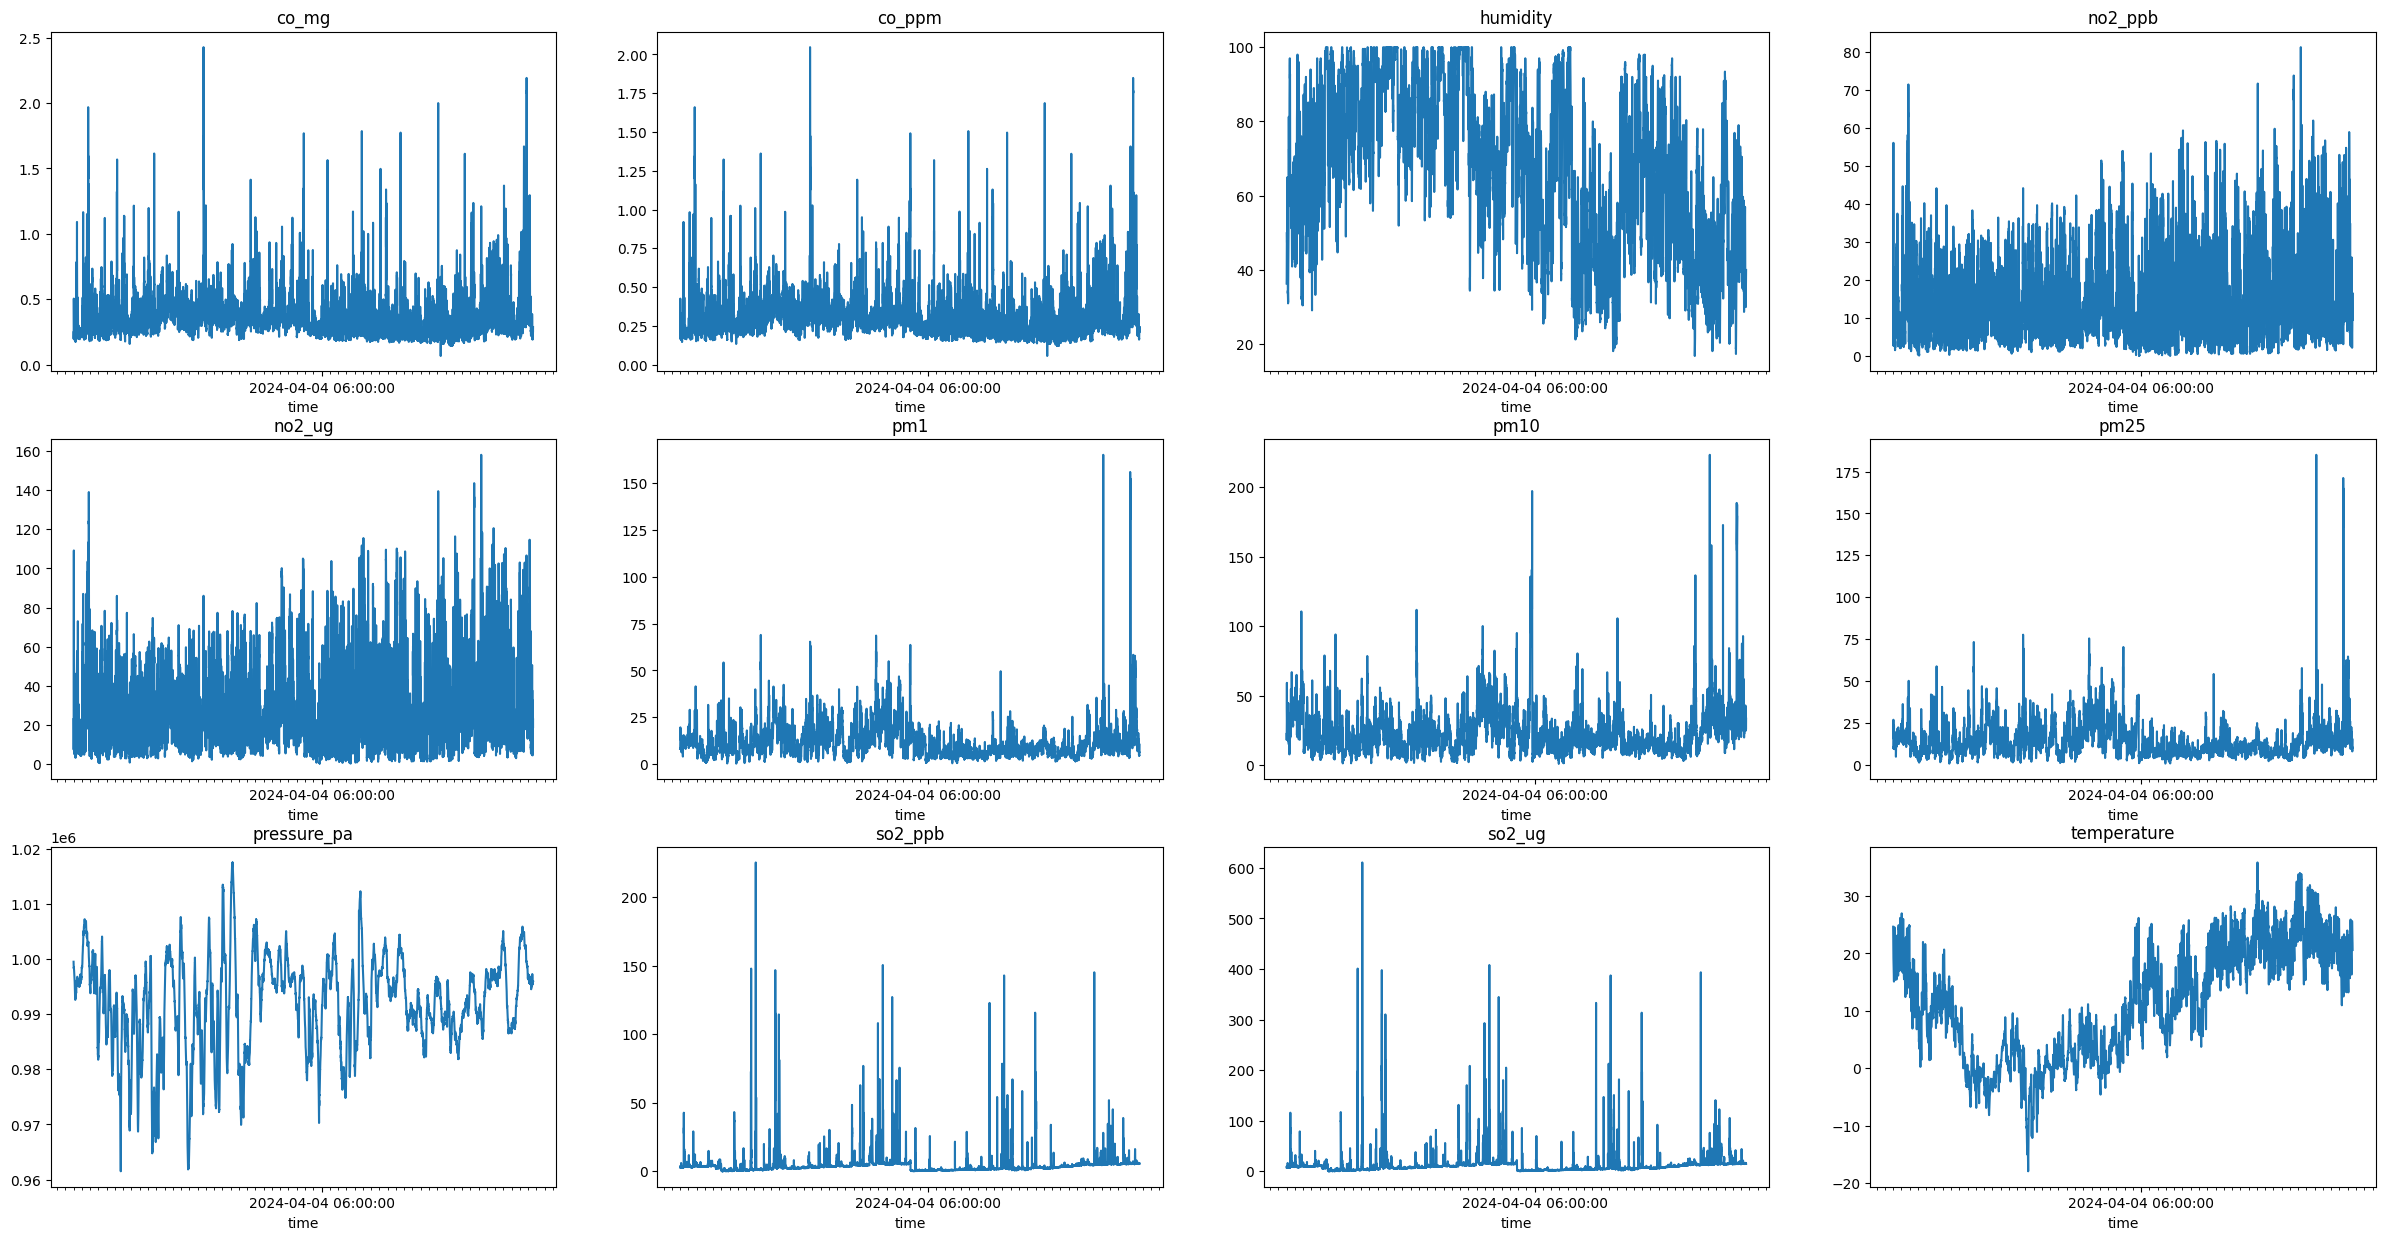

In [12]:
fig, ax = plt.subplots(len_subplt-1, len_subplt, figsize=(30, 15))
for i_title in range(len(features_)):
    a = ax[i_title//len_subplt, i_title%len_subplt]
    a.set_title(features_[i_title])
    a.plot(upt_df[features_[i_title]])
    a.xaxis.set_major_locator(mdates.YearLocator(50))
    a.xaxis.set_minor_locator(mdates.YearLocator())
    a.set_xlabel("time")


In [13]:
pupt_df = upt_df[:100]
pupt_df

,co_mg,co_ppm,humidity,no2_ppb,no2_ug,pm1,pm10,pm25,pressure_pa,so2_ppb,so2_ug,temperature
logged_at,,,,,,,,,,,,
2023-09-18 15:40:00,0.247625,0.208850,36.336350,11.780175,22.942050,8.229100,22.381600,10.276350,999523.5,2.865275,7.770000,24.657250
2023-09-18 16:20:00,0.197680,0.166760,36.700000,3.888460,7.572880,8.260000,19.381340,9.956880,999300.0,2.898580,7.860440,24.400000
2023-09-18 16:40:00,0.206200,0.173900,36.533300,5.385000,10.487400,8.380000,21.746700,10.453300,999167.0,3.111500,8.437767,24.240000
2023-09-18 17:20:00,0.208540,0.175840,36.563750,3.784125,7.369600,8.021075,18.024975,9.626725,998877.5,3.071160,8.328240,23.987275
2023-09-18 17:40:00,0.220050,0.185600,37.692100,6.894100,13.426300,8.333400,20.291850,10.164350,998805.0,3.028650,8.213150,23.666600
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20 07:20:00,0.222300,0.187520,79.679825,11.614000,22.618400,8.225100,17.280760,10.310275,993000.0,2.889540,7.835980,15.680000
2023-09-20 07:40:00,0.234600,0.197900,81.242850,13.161100,25.631450,7.968800,14.906900,9.599800,993000.0,2.836900,7.693100,15.741450
2023-09-20 08:20:00,0.243700,0.205575,78.801325,11.174725,21.762975,7.576425,15.340725,9.194225,993055.0,2.857625,7.749225,16.402075


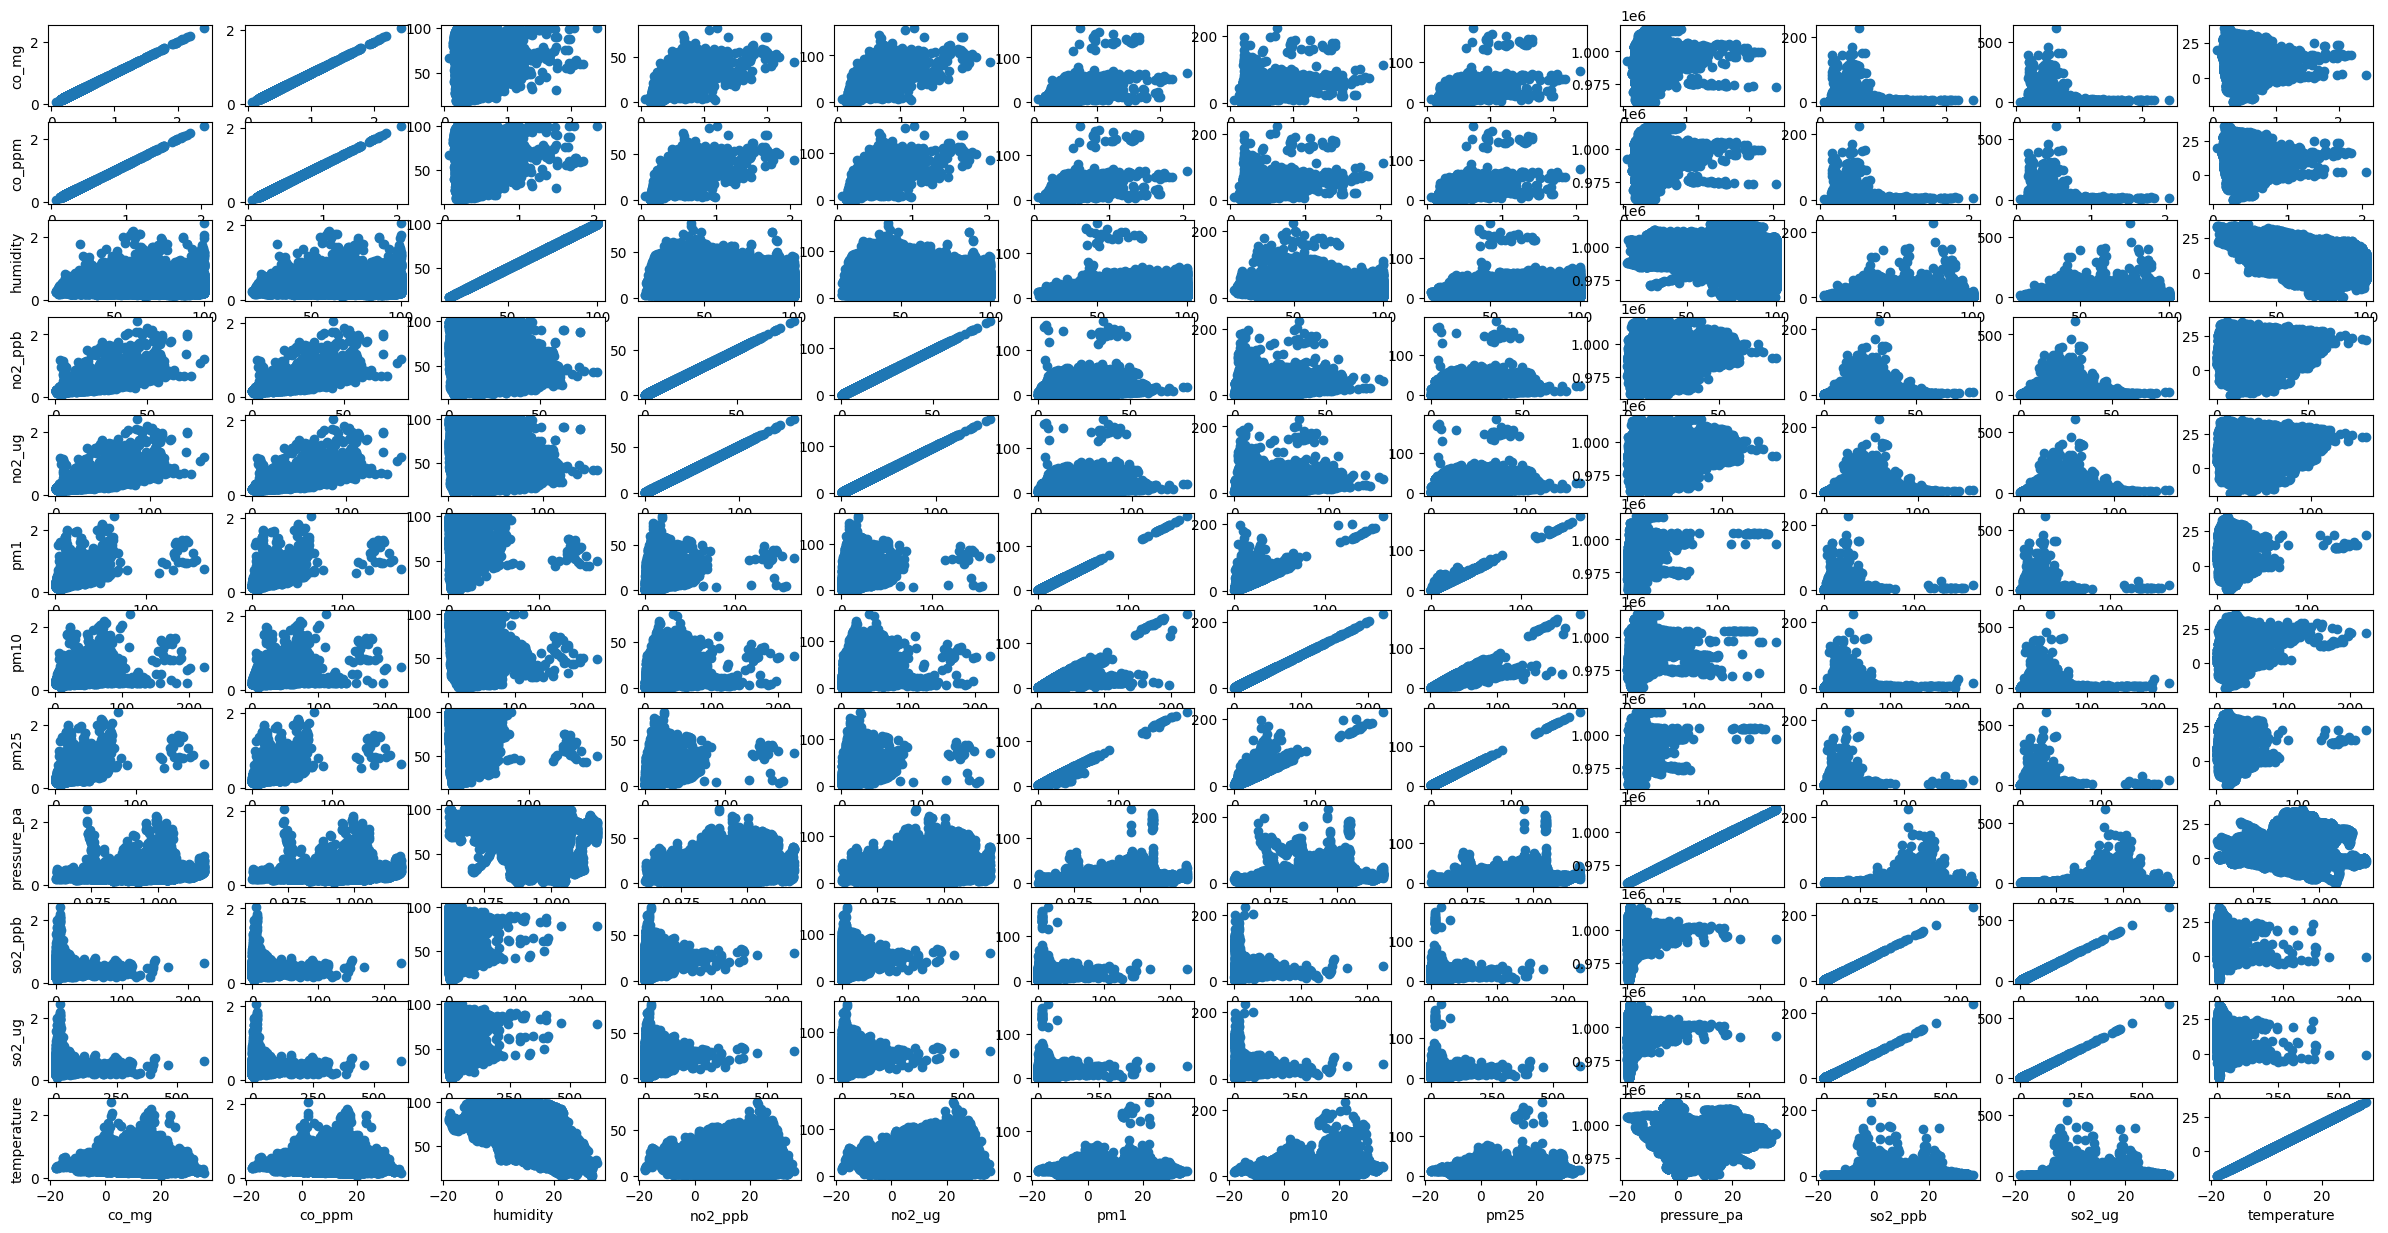

In [14]:
fig, ax = plt.subplots(len(features_), len(features_), figsize=(30, 15))
for i in range(len(features_)):
    for j in range(len(features_)):
        a = ax[i, j]
        a.scatter(upt_df[features_[i]], upt_df[features_[j]])
        if j==0:
            a.set_ylabel(features_[i])
        if i==len(features_)-1:
            a.set_xlabel(features_[j])
    

#### Коефіцієнт кореляції Пірсона

<Axes: >

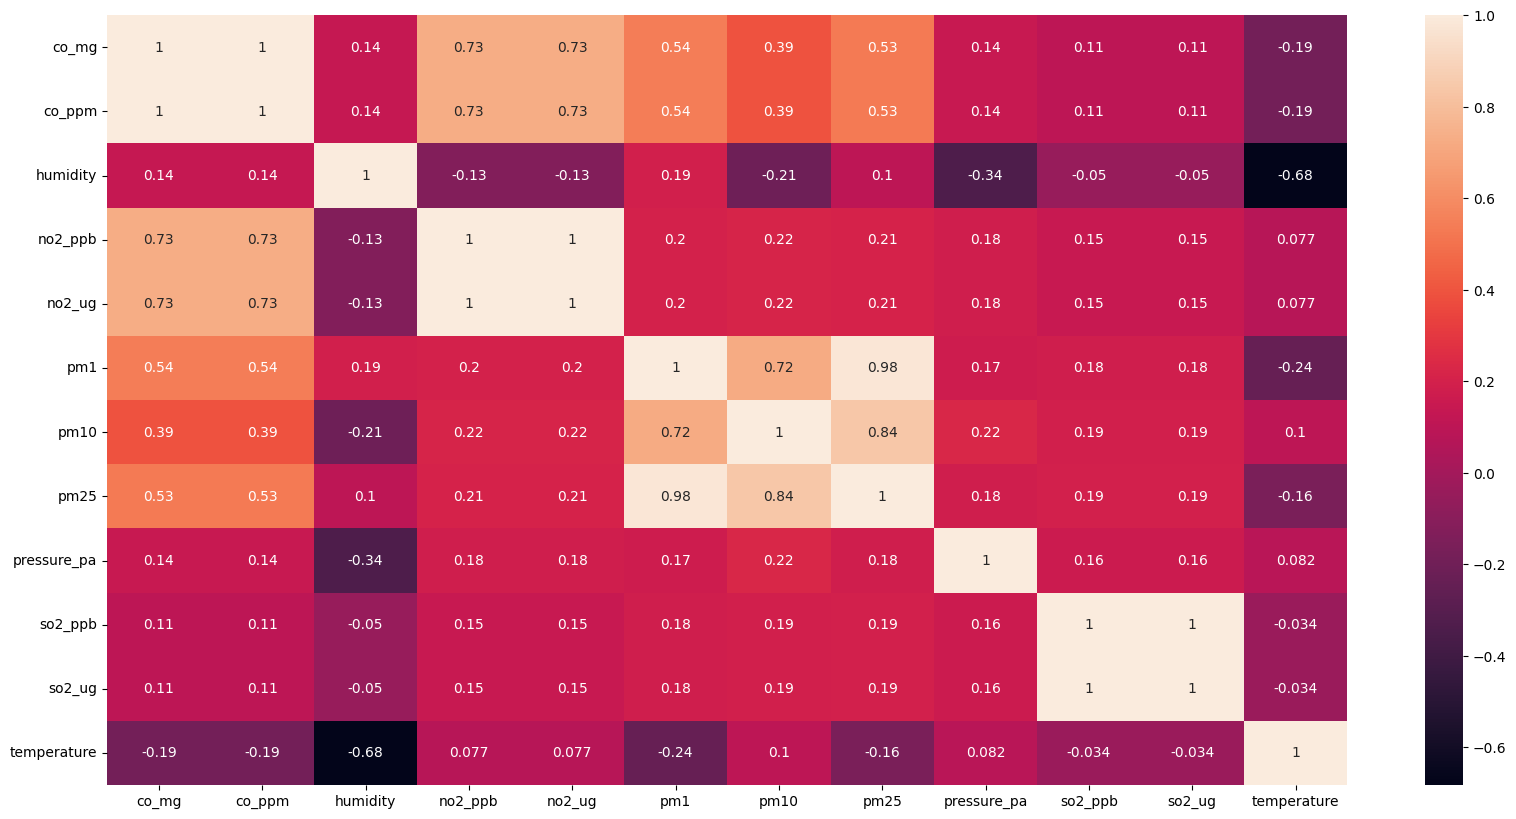

In [15]:
fig, axes = plt.subplots(figsize=(20, 10))

sns.heatmap(data=upt_df.corr(method="pearson"), ax=axes, annot=True)

Отже мають залежність один від одного наступні забруднювачі CO та NO<sub>2</sub>; PM1, PM10, PM2.5

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
df_model = upt_df.reset_index()
df_model = df_model.drop("logged_at", axis="columns")
df_model

,co_mg,co_ppm,humidity,no2_ppb,no2_ug,pm1,pm10,pm25,pressure_pa,so2_ppb,so2_ug,temperature
0,0.247625,0.208850,36.336350,11.780175,22.942050,8.229100,22.381600,10.276350,999523.500000,2.865275,7.770000,24.657250
1,0.197680,0.166760,36.700000,3.888460,7.572880,8.260000,19.381340,9.956880,999300.000000,2.898580,7.860440,24.400000
2,0.206200,0.173900,36.533300,5.385000,10.487400,8.380000,21.746700,10.453300,999167.000000,3.111500,8.437767,24.240000
3,0.208540,0.175840,36.563750,3.784125,7.369600,8.021075,18.024975,9.626725,998877.500000,3.071160,8.328240,23.987275
4,0.220050,0.185600,37.692100,6.894100,13.426300,8.333400,20.291850,10.164350,998805.000000,3.028650,8.213150,23.666600
...,...,...,...,...,...,...,...,...,...,...,...,...
20300,0.256467,0.216367,35.611750,10.257833,19.975333,6.345600,25.676083,9.992000,995892.000000,5.738167,15.560800,21.889583
20301,0.247900,0.209100,36.071450,9.525550,18.549300,6.267150,26.483550,9.801450,995945.000000,5.579850,15.131450,21.646450
20302,0.264870,0.223350,37.668750,9.472050,18.445170,7.215670,28.725750,11.102000,995939.200000,5.838280,15.832250,21.213580
20303,0.270967,0.228533,39.052083,11.532750,22.458033,8.935417,29.981633,13.251083,995986.333333,5.835983,15.826083,20.842367


In [29]:
X = df_model[["co_mg", "pm1", "pm10"]]
Y = df_model["pm25"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

[Text(0.5, 0, 'pm25 test'), Text(0, 0.5, 'pm25 pred')]

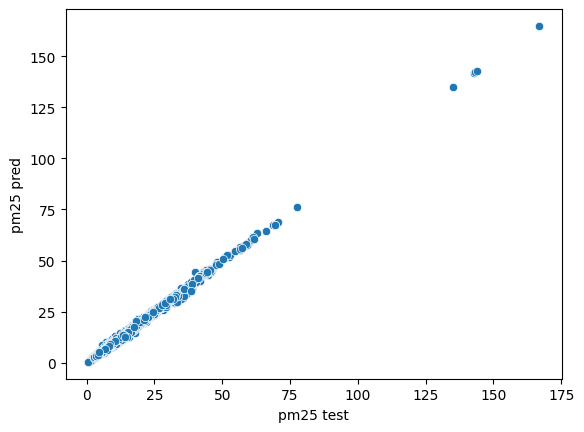

In [33]:
perc_model = LinearRegression()
perc_model.fit(x_train, y_train)
perc_y_pred = perc_model.predict(x_test)

fr = sns.scatterplot(x=y_test, 
                     y=perc_y_pred.reshape(perc_y_pred.shape[0]), 
                     )
fr.set(xlabel='pm25 test', ylabel='pm25 pred')

In [34]:
print(f"RMSE = {float(np.sqrt(round(mean_squared_error(y_test, perc_y_pred), 5)))}")

RMSE = 0.5359384292994859


In [35]:
print(f"R^2 = {r2_score(y_test, perc_y_pred)}")

R^2 = 0.9972555461414722
